In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [2]:
x , y_true = make_blobs(n_samples =500,centers=3,cluster_std=0.60,random_state=42)

In [3]:
df = pd.DataFrame(x,columns=['Feature_1','Feature_2'])

In [4]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [6]:
inertia = []
k_range = range(1,11)

In [7]:
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

In [8]:
inertia

[1000.0000000000002,
 297.89541410517234,
 11.575484723104983,
 9.752067977356848,
 8.257175272446283,
 6.917577320416797,
 6.334755391595287,
 5.704177177901432,
 5.060234133532079,
 4.7623618981304]

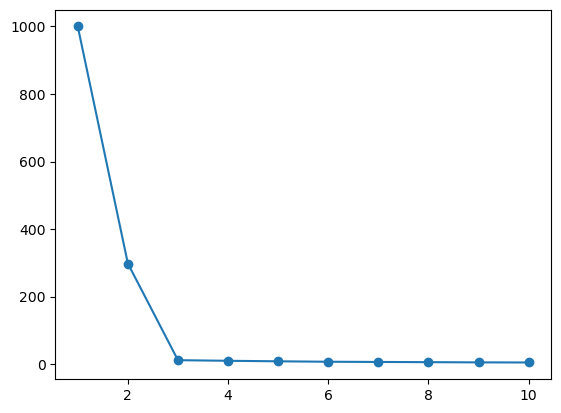

In [9]:
plt.plot(k_range,inertia,marker='o')

In [10]:
kmeans_final = KMeans(n_clusters=3,random_state=42)

In [11]:
cluster_labels = kmeans_final.fit_predict(x_scaled)

In [12]:
cluster_labels

array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0,

In [13]:
df['cluster']=cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

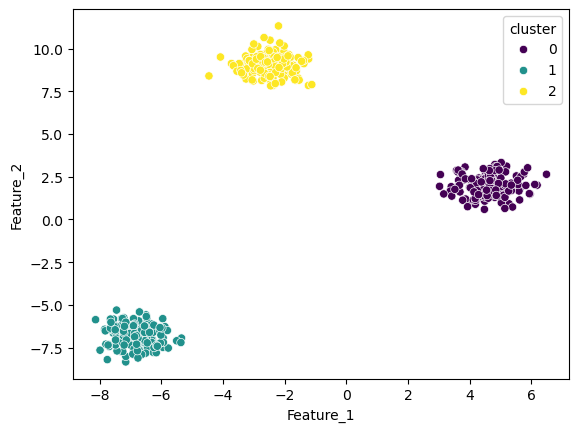

In [14]:
sns.scatterplot(x=df['Feature_1'],y=df['Feature_2'],hue=df['cluster'],palette='viridis')

In [15]:
from sklearn.datasets import make_moons

In [16]:
X,Y_true = make_moons(n_samples=500,noise=0.05,random_state=42)

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
df = pd.DataFrame(X,columns=['value_1','value_2'])

In [19]:
df

,value_1,value_2
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185
...,...,...
495,0.239754,0.985462
496,0.072145,0.184834
497,0.590273,-0.365577
498,1.619465,-0.283658


In [20]:
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(df)

In [21]:
k_means = KMeans(n_clusters=2,random_state=42)
kmeans_labels = k_means.fit_predict(X_scaled_2)

In [22]:
df["kmeans_cluster"] = kmeans_labels

<Axes: xlabel='value_1', ylabel='value_2'>

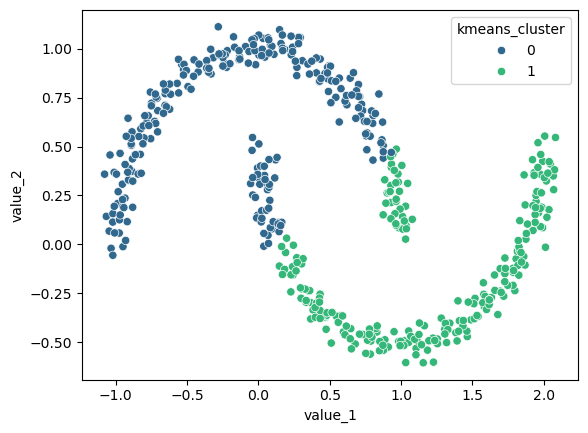

In [23]:
sns.scatterplot(x=df['value_1'],y=df['value_2'],hue=df['kmeans_cluster'],palette='viridis')

In [24]:
dbscan = DBSCAN(eps=0.3,min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled_2)

In [25]:
df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='value_1', ylabel='value_2'>

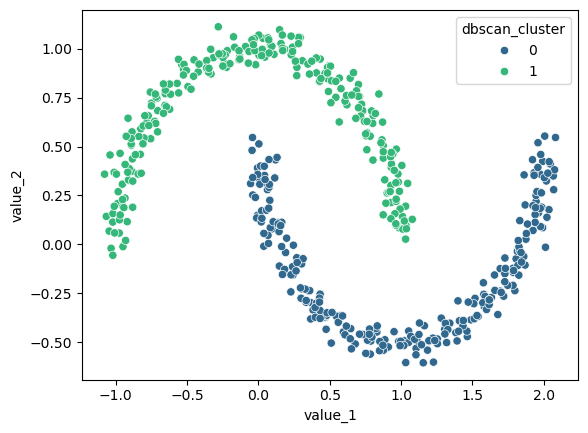

In [26]:
sns.scatterplot(x=df['value_1'],y=df['value_2'],hue=df['dbscan_cluster'],palette='viridis')

# Dimensionality Reduction using PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
x_d , y_true_d = make_blobs(n_samples =500,n_features=5,centers=3,cluster_std=1.5,random_state=42)

In [29]:
x_d

array([[ -9.85712583,   9.52196609,   6.40680626,  -6.81757623,
         -7.86054541],
       [ -8.04717781,   8.40261648,   6.40946097,  -4.33576029,
         -6.70289196],
       [ -3.73690895,   6.7601386 ,   4.24877609,   0.28504117,
         -7.10318219],
       ...,
       [ -5.82805   ,  -7.29173339,   7.48633693,   2.71623974,
          7.33823548],
       [ -2.48648271,   9.67739715,   6.21190845,   1.03031506,
         -7.54637531],
       [ -8.63901448, -10.68852991,   8.36601977,   4.94211449,
          3.77070371]])

In [30]:
scaler_d = StandardScaler()
x_d_scaled = scaler_d.fit_transform(x_d)

In [32]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_d_scaled)

In [35]:
df_pca = pd.DataFrame(x_pca,columns=['pc1','pc2'])
df_pca['labels']=y_true_d

<Axes: xlabel='pc1', ylabel='pc2'>

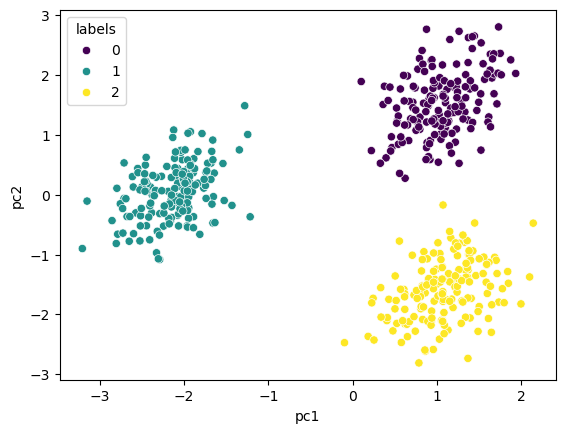

In [38]:
sns.scatterplot(x=df_pca['pc1'],y=df_pca['pc2'],hue=df_pca['labels'],palette='viridis')